In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines


plt.rcParams['legend.title_fontsize'] = 'large'

import altair as alt
from altair import datum


In [3]:
modeling_df = pd.read_csv("../data/microsimulation_results/scenarios_aware.csv")
modeling_df.head()

,week,Empirical,To.Aware_S0,To.Aware_S1,To.Aware_S2,To.Aware_S3,To.Aware_S4,To.Aware_S5,To.Aware_S6,To.Aware_S7,...,To.Aware_S10,To.Aware_S11,To.Aware_S12,To.Aware_S13,To.Aware_S14,To.Aware_S15,To.Aware_S16,To.Aware_S17,To.Aware_S18,To.Aware_S19
0,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,2,2,2,1,2,2,2,2,...,2,1,2,2,2,2,2,2,2,2
2,2,0.0,0,0,0,1,1,1,2,1,...,1,2,0,0,1,1,1,1,1,1
3,3,0.0,0,0,0,1,1,1,1,1,...,2,1,0,0,1,1,1,0,2,1
4,4,3.0,0,0,0,1,1,1,2,1,...,3,1,1,0,1,1,1,1,3,1


In [4]:
start_date = datetime(2023, 3, 1)
modeling_df['week_date'] = modeling_df['week'].apply(lambda x: (start_date + timedelta(weeks=x)).strftime('%Y-%m-%d'))
modeling_df = modeling_df.dropna()
modeling_df.head()

,week,Empirical,To.Aware_S0,To.Aware_S1,To.Aware_S2,To.Aware_S3,To.Aware_S4,To.Aware_S5,To.Aware_S6,To.Aware_S7,...,To.Aware_S11,To.Aware_S12,To.Aware_S13,To.Aware_S14,To.Aware_S15,To.Aware_S16,To.Aware_S17,To.Aware_S18,To.Aware_S19,week_date
0,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023-03-01
1,1,0.0,2,2,2,1,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2023-03-08
2,2,0.0,0,0,0,1,1,1,2,1,...,2,0,0,1,1,1,1,1,1,2023-03-15
3,3,0.0,0,0,0,1,1,1,1,1,...,1,0,0,1,1,1,0,2,1,2023-03-22
4,4,3.0,0,0,0,1,1,1,2,1,...,1,1,0,1,1,1,1,3,1,2023-03-29


In [5]:
print(sns.color_palette("CMRmap").as_hex())

['#2b2688', '#632aad', '#c4385a', '#f06510', '#e6ad12', '#e6e172']


/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/4035750669.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexual_behavior_long.variable[sexual_behavior_long.variable == "Empirical"] = "Empirical"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/4035750669.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S13"] = "0.7"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/4035750669.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

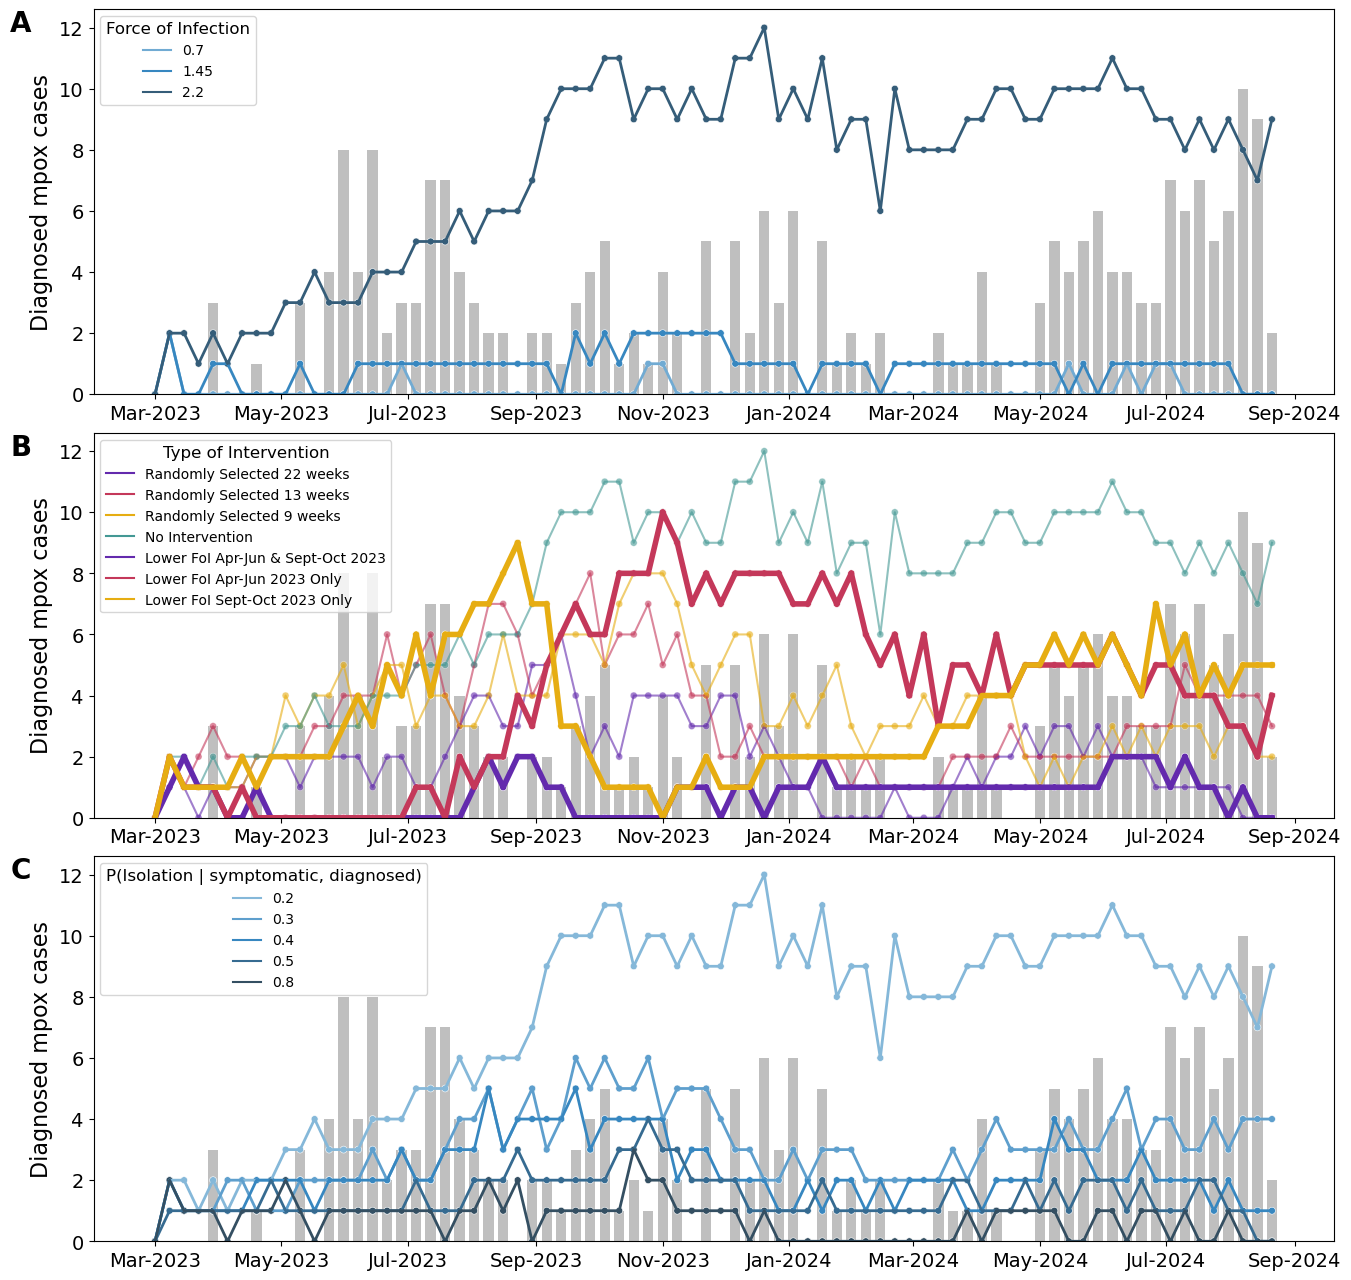

In [39]:
# Plotting FoI with phylo imports
fig = plt.figure(figsize=(16,16),facecolor='w')


#gs = GridSpec(2, 2, height_ratios=[6, 1], width_ratios=[0.25, 1], hspace=0.1)  
gs = GridSpec(3, 1,  hspace=0.1)  # three rows, one column

# Add the first subplot 
ax1 = fig.add_subplot(gs[0])

sexual_behavior_long = pd.melt(modeling_df, id_vars='week_date', value_vars=['Empirical','To.Aware_S13', 'To.Aware_S12', 'To.Aware_S6'])
sexual_behavior_long.week_date = pd.to_datetime(sexual_behavior_long.week_date)

sexual_behavior_long.variable[sexual_behavior_long.variable == "Empirical"] = "Empirical"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S13"] = "0.7"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S12"] = "1.45"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S6"] = "2.2"

#plot empirical cases
ax1.bar(sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].week_date ,sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot linegraph of simulated cases
sns.lineplot(
    data=sexual_behavior_long[sexual_behavior_long.variable != "Empirical"],
    x='week_date',
    y='value',
    hue='variable',
    palette='Blues_d',
    legend= "full", 
    linewidth = 2,
    ax = ax1
)

#plot scatter points of simulated cases on top of linegraph
sns.scatterplot(
    data=sexual_behavior_long[sexual_behavior_long.variable != "Empirical"],
    x='week_date',
    y='value',
    hue = "variable",
    palette = "Blues_d",
    s=25,  # Adjust point size
    marker='o', 
    legend = None, 
    ax = ax1
)

# Add the second subplot for the potential public health interventions based on phylo results
ax2 = fig.add_subplot(gs[1])

colors = sns.color_palette("CMRmap").as_hex()

PH_import_intervention_long = pd.melt(modeling_df, id_vars='week_date', value_vars=['Empirical','To.Aware_S11', 'To.Aware_S15', 'To.Aware_S16','To.Aware_S17', 'To.Aware_S18', 'To.Aware_S19', 'To.Aware_S6'])
PH_import_intervention_long.week_date = pd.to_datetime(PH_import_intervention_long.week_date)

PH_import_intervention_long.variable[PH_import_intervention_long.variable == "Empirical"] = "Empirical"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S11"] = "Lower FoI Apr-Jun & Sept-Oct 2023"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S15"] = "Lower FoI Apr-Jun 2023 Only"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S16"] = "Lower FoI Sept-Oct 2023 Only"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S17"] = "Randomly Selected 22 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S18"] = "Randomly Selected 13 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S19"] = "Randomly Selected 9 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S6"] = "No Intervention"


#plot empirical cases
ax2.bar(PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].week_date ,PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

sensitivity_tests = ["Randomly Selected 22 weeks", "Randomly Selected 13 weeks", "Randomly Selected 9 weeks", "No Intervention"]


#plot linegraph of simulated cases
sns.lineplot(
    data=PH_import_intervention_long[(PH_import_intervention_long['variable'] != "Empirical") & (PH_import_intervention_long['variable'].isin(sensitivity_tests))],
    x='week_date',
    y='value',
    hue='variable',
    palette= [colors[1], colors[2], colors[4], "#439894"],
    alpha = 0.6,
    legend= "full", 
    ax = ax2
)

#plot scatter points of simulated cases on top of linegraph
sns.scatterplot(
    data=PH_import_intervention_long[(PH_import_intervention_long['variable'] != "Empirical") & (PH_import_intervention_long['variable'].isin(sensitivity_tests))],
    x='week_date',
    y='value',
    hue = "variable",
    palette= [colors[1], colors[2], colors[4], "#439894"],
    s=25,  # Adjust point size
    marker='o', 
    alpha = 0.6,
    legend = None, 
    ax = ax2
)

sns.lineplot(
    data=PH_import_intervention_long[(PH_import_intervention_long['variable'] != "Empirical") & (~PH_import_intervention_long['variable'].isin(sensitivity_tests))],
    x='week_date',
    y='value',
    hue='variable',
    palette= [colors[1], colors[2], colors[4], colors[5]],
    dashes = True, 
    legend= "full", 
    linewidth = 4, #make the intervention lines of interest thicker so that they stand out
    ax = ax2
)

sns.scatterplot(
    data=PH_import_intervention_long[(PH_import_intervention_long['variable'] != "Empirical") & (~PH_import_intervention_long['variable'].isin(sensitivity_tests))],
    x='week_date',
    y='value',
    hue = "variable",
    palette= [colors[1], colors[2], colors[4], colors[5]],
    s=25,  # Adjust point size
    marker='o', 
    alpha = 1,
    legend = None, 
    ax = ax2
)


# Add the third subplot 
ax3 = fig.add_subplot(gs[2])

long_prop_iso_df = pd.melt(modeling_df, id_vars='week_date', value_vars=["Empirical", 'To.Aware_S6', 'To.Aware_S5', "To.Aware_S4", "To.Aware_S3", "To.Aware_S14"])
long_prop_iso_df.week_date = pd.to_datetime(long_prop_iso_df.week_date)

# long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S7"] = "0.0"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S6"] = "0.2"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S5"] = "0.3"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S4"] = "0.4"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S3"] = "0.5"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S14"] = "0.8"


#plot empirical cases
ax3.bar(long_prop_iso_df[long_prop_iso_df.variable == "Empirical"].week_date ,long_prop_iso_df[long_prop_iso_df.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot linegraph of simulated cases
sns.lineplot(
    data=long_prop_iso_df[long_prop_iso_df.variable != "Empirical"],
    x='week_date',
    y='value',
    hue='variable',
    palette='Blues_d',
    legend= "full", 
    linewidth = 2,
    ax = ax3
)

#plot scatter points of simulated cases on top of linegraph
sns.scatterplot(
    data=long_prop_iso_df[long_prop_iso_df.variable != "Empirical"],
    x='week_date',
    y='value',
    hue = "variable",
    palette = "Blues_d",
    s=25,  # Adjust point size
    marker='o', 
    legend = None, 
    ax = ax3
)

ax1.legend(title = "Force of Infection", loc = "upper left")
ax2.legend(title = "Type of Intervention", loc = "upper left")
ax3.legend(title = "P(Isolation | symptomatic, diagnosed)", loc = "upper left")



# Format the x-axis for dates
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
#ax1.xticks(rotation=45)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Set axis labels
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_ylabel('Diagnosed mpox cases', size = 16)
ax1.set_xlabel('')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax2.set_ylabel('Diagnosed mpox cases', size = 16)
ax2.set_xlabel('')
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='minor', labelsize=14)
ax3.set_ylabel('Diagnosed mpox cases', size = 16)
ax3.set_xlabel('')
#ax.set_ylim(0, 0.10)  # Y-axis limits

## add in letters for pub
ax1.text(-0.05, 1, "A", transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax2.text(-0.05, 1, "B", transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax3.text(-0.05, 1, "C", transform=ax3.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  


# Show the plot
plt.tight_layout()
#plt.savefig('../figures/microsim_results.png',dpi=300,bbox_inches='tight')
plt.show()

/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/3657686666.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexual_behavior_long.variable[sexual_behavior_long.variable == "Empirical"] = "Empirical"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/3657686666.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S13"] = "0.7"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/3657686666.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

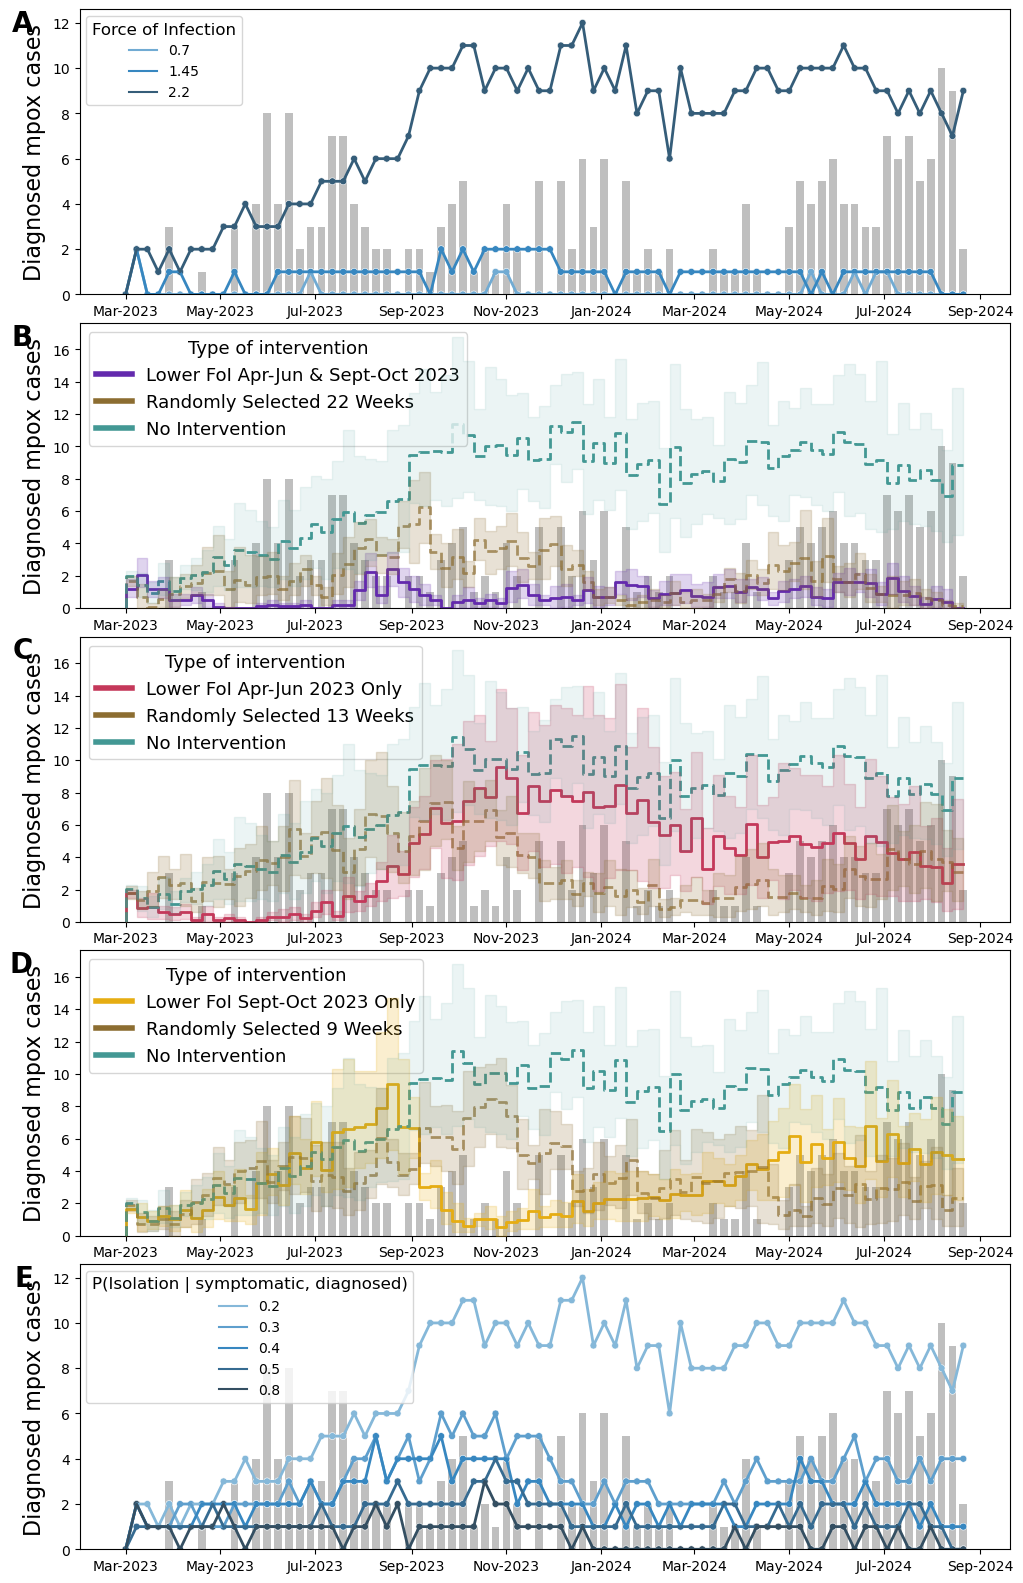

In [79]:
# Plotting FoI with phylo imports
fig = plt.figure(figsize=(12,20),facecolor='w')


#gs = GridSpec(2, 2, height_ratios=[6, 1], width_ratios=[0.25, 1], hspace=0.1)  
gs = GridSpec(5,1,  hspace=0.1)  # three rows, one column

# Add the first subplot 
ax1 = fig.add_subplot(gs[0])

sexual_behavior_long = pd.melt(modeling_df, id_vars='week_date', value_vars=['Empirical','To.Aware_S13', 'To.Aware_S12', 'To.Aware_S6'])
sexual_behavior_long.week_date = pd.to_datetime(sexual_behavior_long.week_date)

sexual_behavior_long.variable[sexual_behavior_long.variable == "Empirical"] = "Empirical"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S13"] = "0.7"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S12"] = "1.45"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S6"] = "2.2"

#plot empirical cases
ax1.bar(sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].week_date ,sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot linegraph of simulated cases
sns.lineplot(
    data=sexual_behavior_long[sexual_behavior_long.variable != "Empirical"],
    x='week_date',
    y='value',
    hue='variable',
    palette='Blues_d',
    legend= "full", 
    linewidth = 2,
    ax = ax1
)

#plot scatter points of simulated cases on top of linegraph
sns.scatterplot(
    data=sexual_behavior_long[sexual_behavior_long.variable != "Empirical"],
    x='week_date',
    y='value',
    hue = "variable",
    palette = "Blues_d",
    s=25,  # Adjust point size
    marker='o', 
    legend = None, 
    ax = ax1
)

# Add the second subplot for the potential public health interventions based on phylo results
ax2 = fig.add_subplot(gs[1])

colors = sns.color_palette("CMRmap").as_hex()

PH_import_intervention_long = pd.melt(modeling_df, id_vars='week_date', value_vars=['Empirical','To.Aware_S11', 'To.Aware_S15', 'To.Aware_S16','To.Aware_S17', 'To.Aware_S18', 'To.Aware_S19', 'To.Aware_S6'])
PH_import_intervention_long.week_date = pd.to_datetime(PH_import_intervention_long.week_date)

PH_import_intervention_long.variable[PH_import_intervention_long.variable == "Empirical"] = "Empirical"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S11"] = "Lower FoI Apr-Jun & Sept-Oct 2023"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S15"] = "Lower FoI Apr-Jun 2023 Only"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S16"] = "Lower FoI Sept-Oct 2023 Only"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S17"] = "Randomly Selected 22 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S18"] = "Randomly Selected 13 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S19"] = "Randomly Selected 9 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S6"] = "No Intervention"


#plot empirical cases
ax2.bar(PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].week_date ,PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot estimates with uncertainty intervals
ax2.step(modeling_df.week_date, modeling_df["Mean_S11"], color=colors[1],lw=2 )
ax2.fill_between(modeling_df.week_date, modeling_df["LowerBound_S11"], modeling_df["UpperBound_S11"],alpha=0.2, step = "pre", facecolor=colors[1],edgecolor=colors[1],zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["LowerBound_S11"],color=colors[1],lw=1,zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["UpperBound_S11"],color=colors[1],lw=1,zorder=1000)

ax2.step(modeling_df.week_date, modeling_df["Mean_S17"], color="#8c6d31", alpha = 0.7, ls='--',lw=2 )
ax2.fill_between(modeling_df.week_date, modeling_df["LowerBound_S17"], modeling_df["UpperBound_S17"],alpha=0.2, step = "pre", facecolor="#8c6d31",edgecolor="#8c6d31",zorder=1000)

ax2.step(modeling_df.week_date, modeling_df["Mean_S6"], color="#439894",ls='--',lw=2 )
ax2.fill_between(modeling_df.week_date, modeling_df["LowerBound_S6"], modeling_df["UpperBound_S6"],alpha=0.1, step = "pre", facecolor="#439894",edgecolor="#439894",zorder=1000)


legend_list = [mlines.Line2D([0], [0], color=colors[1], lw=4, label='Lower FoI Apr-Jun & Sept-Oct 2023'),
                mlines.Line2D([0], [0], color="#8c6d31", lw=4, label='Randomly Selected 22 Weeks'),
              mlines.Line2D([0], [0], color="#439894", lw=4, label='No Intervention'),]
ax2.legend(handles=legend_list, title='Type of intervention', fontsize=13, title_fontsize=13, loc='upper left')


# Add the third subplot 
ax3 = fig.add_subplot(gs[2])

#plot empirical cases
ax3.bar(PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].week_date ,PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot estimates with uncertainty intervals
ax3.step(modeling_df.week_date, modeling_df["Mean_S15"], color=colors[2],lw=2 )
ax3.fill_between(modeling_df.week_date, modeling_df["LowerBound_S15"], modeling_df["UpperBound_S15"],alpha=0.2, step = "pre", facecolor=colors[2],edgecolor=colors[2],zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["LowerBound_S11"],color=colors[1],lw=1,zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["UpperBound_S11"],color=colors[1],lw=1,zorder=1000)

ax3.step(modeling_df.week_date, modeling_df["Mean_S18"], color="#8c6d31", alpha = 0.7, ls='--',lw=2 )
ax3.fill_between(modeling_df.week_date, modeling_df["LowerBound_S18"], modeling_df["UpperBound_S18"],alpha=0.2, step = "pre", facecolor="#8c6d31",edgecolor="#8c6d31",zorder=1000)

ax3.step(modeling_df.week_date, modeling_df["Mean_S6"], color="#439894",ls='--',lw=2 )
ax3.fill_between(modeling_df.week_date, modeling_df["LowerBound_S6"], modeling_df["UpperBound_S6"],alpha=0.1, step = "pre", facecolor="#439894",edgecolor="#439894",zorder=1000)


legend_list = [mlines.Line2D([0], [0], color=colors[2], lw=4, label='Lower FoI Apr-Jun 2023 Only'),
                mlines.Line2D([0], [0], color="#8c6d31", lw=4, label='Randomly Selected 13 Weeks'),
              mlines.Line2D([0], [0], color="#439894", lw=4, label='No Intervention'),]
ax3.legend(handles=legend_list, title='Type of intervention', fontsize=13, title_fontsize=13, loc='upper left')


# Add the fourth subplot 
ax4 = fig.add_subplot(gs[3])

#plot empirical cases
ax4.bar(PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].week_date ,PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot estimates with uncertainty intervals
ax4.step(modeling_df.week_date, modeling_df["Mean_S16"], color=colors[4],lw=2 )
ax4.fill_between(modeling_df.week_date, modeling_df["LowerBound_S16"], modeling_df["UpperBound_S16"],alpha=0.2, step = "pre", facecolor=colors[4],edgecolor=colors[4],zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["LowerBound_S11"],color=colors[1],lw=1,zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["UpperBound_S11"],color=colors[1],lw=1,zorder=1000)

ax4.step(modeling_df.week_date, modeling_df["Mean_S19"], color="#8c6d31", alpha = 0.7, ls='--',lw=2 )
ax4.fill_between(modeling_df.week_date, modeling_df["LowerBound_S19"], modeling_df["UpperBound_S19"],alpha=0.2, step = "pre", facecolor="#8c6d31",edgecolor="#8c6d31",zorder=1000)

ax4.step(modeling_df.week_date, modeling_df["Mean_S6"], color="#439894",ls='--',lw=2 )
ax4.fill_between(modeling_df.week_date, modeling_df["LowerBound_S6"], modeling_df["UpperBound_S6"],alpha=0.1, step = "pre", facecolor="#439894",edgecolor="#439894",zorder=1000)

legend_list = [mlines.Line2D([0], [0], color=colors[4], lw=4, label='Lower FoI Sept-Oct 2023 Only'),
                mlines.Line2D([0], [0], color="#8c6d31", lw=4, label='Randomly Selected 9 Weeks'),
              mlines.Line2D([0], [0], color="#439894", lw=4, label='No Intervention'),]
ax4.legend(handles=legend_list, title='Type of intervention', fontsize=13, title_fontsize=13, loc='upper left')




# Add the third subplot 
ax5 = fig.add_subplot(gs[4])

long_prop_iso_df = pd.melt(modeling_df, id_vars='week_date', value_vars=["Empirical", 'To.Aware_S6', 'To.Aware_S5', "To.Aware_S4", "To.Aware_S3", "To.Aware_S14"])
long_prop_iso_df.week_date = pd.to_datetime(long_prop_iso_df.week_date)

# long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S7"] = "0.0"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S6"] = "0.2"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S5"] = "0.3"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S4"] = "0.4"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S3"] = "0.5"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S14"] = "0.8"


#plot empirical cases
ax5.bar(long_prop_iso_df[long_prop_iso_df.variable == "Empirical"].week_date ,long_prop_iso_df[long_prop_iso_df.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot linegraph of simulated cases
sns.lineplot(
    data=long_prop_iso_df[long_prop_iso_df.variable != "Empirical"],
    x='week_date',
    y='value',
    hue='variable',
    palette='Blues_d',
    legend= "full", 
    linewidth = 2,
    ax = ax5
)

#plot scatter points of simulated cases on top of linegraph
sns.scatterplot(
    data=long_prop_iso_df[long_prop_iso_df.variable != "Empirical"],
    x='week_date',
    y='value',
    hue = "variable",
    palette = "Blues_d",
    s=25,  # Adjust point size
    marker='o', 
    legend = None, 
    ax = ax5
)

ax1.legend(title = "Force of Infection", loc = "upper left")
#ax2.legend(title = "Type of Intervention", loc = "upper left")
ax5.legend(title = "P(Isolation | symptomatic, diagnosed)", loc = "upper left")



# Format the x-axis for dates
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
#ax1.xticks(rotation=45)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Set axis labels
ax1.set_ylabel('Diagnosed mpox cases', size = 16)
ax2.set_ylabel('Diagnosed mpox cases', size = 16)
ax3.set_ylabel('Diagnosed mpox cases', size = 16)
ax4.set_ylabel('Diagnosed mpox cases', size = 16)
ax5.set_ylabel('Diagnosed mpox cases', size = 16)
#ax.set_ylim(0, 0.10)  # Y-axis limits

## add in letters for pub
ax1.text(-0.05, 1, "A", transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax2.text(-0.05, 1, "B", transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='right') 
ax3.text(-0.05, 1, "C", transform=ax3.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax4.text(-0.05, 1, "D", transform=ax4.transAxes, fontsize=20, fontweight='bold', va='top', ha='right') 
ax5.text(-0.05, 1, "E", transform=ax5.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  

ax5.set_xlabel('')


# Show the plot
plt.tight_layout()
plt.savefig('../figures/microsim_results_supp.png',dpi=300,bbox_inches='tight')
plt.show()

In [7]:
### now plot with Uncertainty intervals

In [8]:
## all the microsimulation results with uncertainty intervals are in seperate folders and files. This function combines all those results
## into a single dataframe. Of note, this specific code snippet was created with help of ChatGPT and 
## edited by Miguel Paredes. The rest of this notebook was written by Miguel. 

# Define the parent folder containing the subfolders
parent_folder = "../data/Microsim results w ci/"

# Initialize an empty list to store the processed DataFrames
dataframes = []

# Loop through each subfolder in the parent folder
for subfolder in os.listdir(parent_folder):
    subfolder_path = os.path.join(parent_folder, subfolder)

    # Check if the current path is a folder and matches the pattern "S0" to "S9"
    if os.path.isdir(subfolder_path) and subfolder.startswith("S"):
        file_path = os.path.join(subfolder_path, "ToAware_bs_results.csv")

        # Check if the target file exists in the subfolder
        if os.path.exists(file_path):
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Rename columns to include the folder name
            folder_name = subfolder
            df.rename(columns={
                "Mean": f"Mean_{folder_name}",
                "UpperBound": f"UpperBound_{folder_name}",
                "LowerBound": f"LowerBound_{folder_name}"
            }, inplace=True)

            # Add the modified DataFrame to the list
            dataframes.append(df)

# Merge all DataFrames on the "Week" column
merged_df = dataframes[0]
for df in dataframes[1:]:
    merged_df = pd.merge(merged_df, df, on="Week")
    
empirical_df = pd.read_csv("../data/microsimulation_results/scenarios_aware.csv")

merged_df = pd.merge(merged_df, empirical_df, left_on = "Week", right_on = "week" )
merged_df.head()

,Week,Mean_S5,LowerBound_S5,UpperBound_S5,Mean_S3,LowerBound_S3,UpperBound_S3,Mean_S4,LowerBound_S4,UpperBound_S4,...,To.Aware_S10,To.Aware_S11,To.Aware_S12,To.Aware_S13,To.Aware_S14,To.Aware_S15,To.Aware_S16,To.Aware_S17,To.Aware_S18,To.Aware_S19
0,0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.9038,1.6,2.2,1.3022,0.9,1.7,1.7974,1.5,2.0,...,2,1,2,2,2,2,2,2,2,2
2,2,1.2120,0.3,2.4,0.8972,0.4,1.4,0.9122,0.2,1.8,...,1,2,0,0,1,1,1,1,1,1
3,3,1.3076,0.6,2.1,0.8246,0.3,1.4,0.7202,0.3,1.2,...,2,1,0,0,1,1,1,0,2,1
4,4,1.3126,0.4,2.5,0.9184,0.2,1.9,0.6998,0.1,1.4,...,3,1,1,0,1,1,1,1,3,1


In [9]:
start_date = datetime(2023, 3, 1)
modeling_df = merged_df.copy()
modeling_df['week_date'] = modeling_df['Week'].apply(lambda x: (start_date + timedelta(weeks=x)).strftime('%Y-%m-%d'))
modeling_df = modeling_df.dropna()
modeling_df.head()

,Week,Mean_S5,LowerBound_S5,UpperBound_S5,Mean_S3,LowerBound_S3,UpperBound_S3,Mean_S4,LowerBound_S4,UpperBound_S4,...,To.Aware_S11,To.Aware_S12,To.Aware_S13,To.Aware_S14,To.Aware_S15,To.Aware_S16,To.Aware_S17,To.Aware_S18,To.Aware_S19,week_date
0,0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2023-03-01
1,1,1.9038,1.6,2.2,1.3022,0.9,1.7,1.7974,1.5,2.0,...,1,2,2,2,2,2,2,2,2,2023-03-08
2,2,1.2120,0.3,2.4,0.8972,0.4,1.4,0.9122,0.2,1.8,...,2,0,0,1,1,1,1,1,1,2023-03-15
3,3,1.3076,0.6,2.1,0.8246,0.3,1.4,0.7202,0.3,1.2,...,1,0,0,1,1,1,0,2,1,2023-03-22
4,4,1.3126,0.4,2.5,0.9184,0.2,1.9,0.6998,0.1,1.4,...,1,1,0,1,1,1,1,3,1,2023-03-29


In [10]:
print(sns.color_palette("Blues_d").as_hex())

['#8abbdb', '#69a6d0', '#4892c6', '#367bac', '#356384', '#344b5b']


/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/2501937311.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH_import_intervention_long.variable[PH_import_intervention_long.variable == "Empirical"] = "Empirical"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/2501937311.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S11"] = "Lower FoI Apr-Jun & Sept-Oct 2023"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/2501937311.py:58: SettingWithCopyWarning: 
A value is trying to be set 

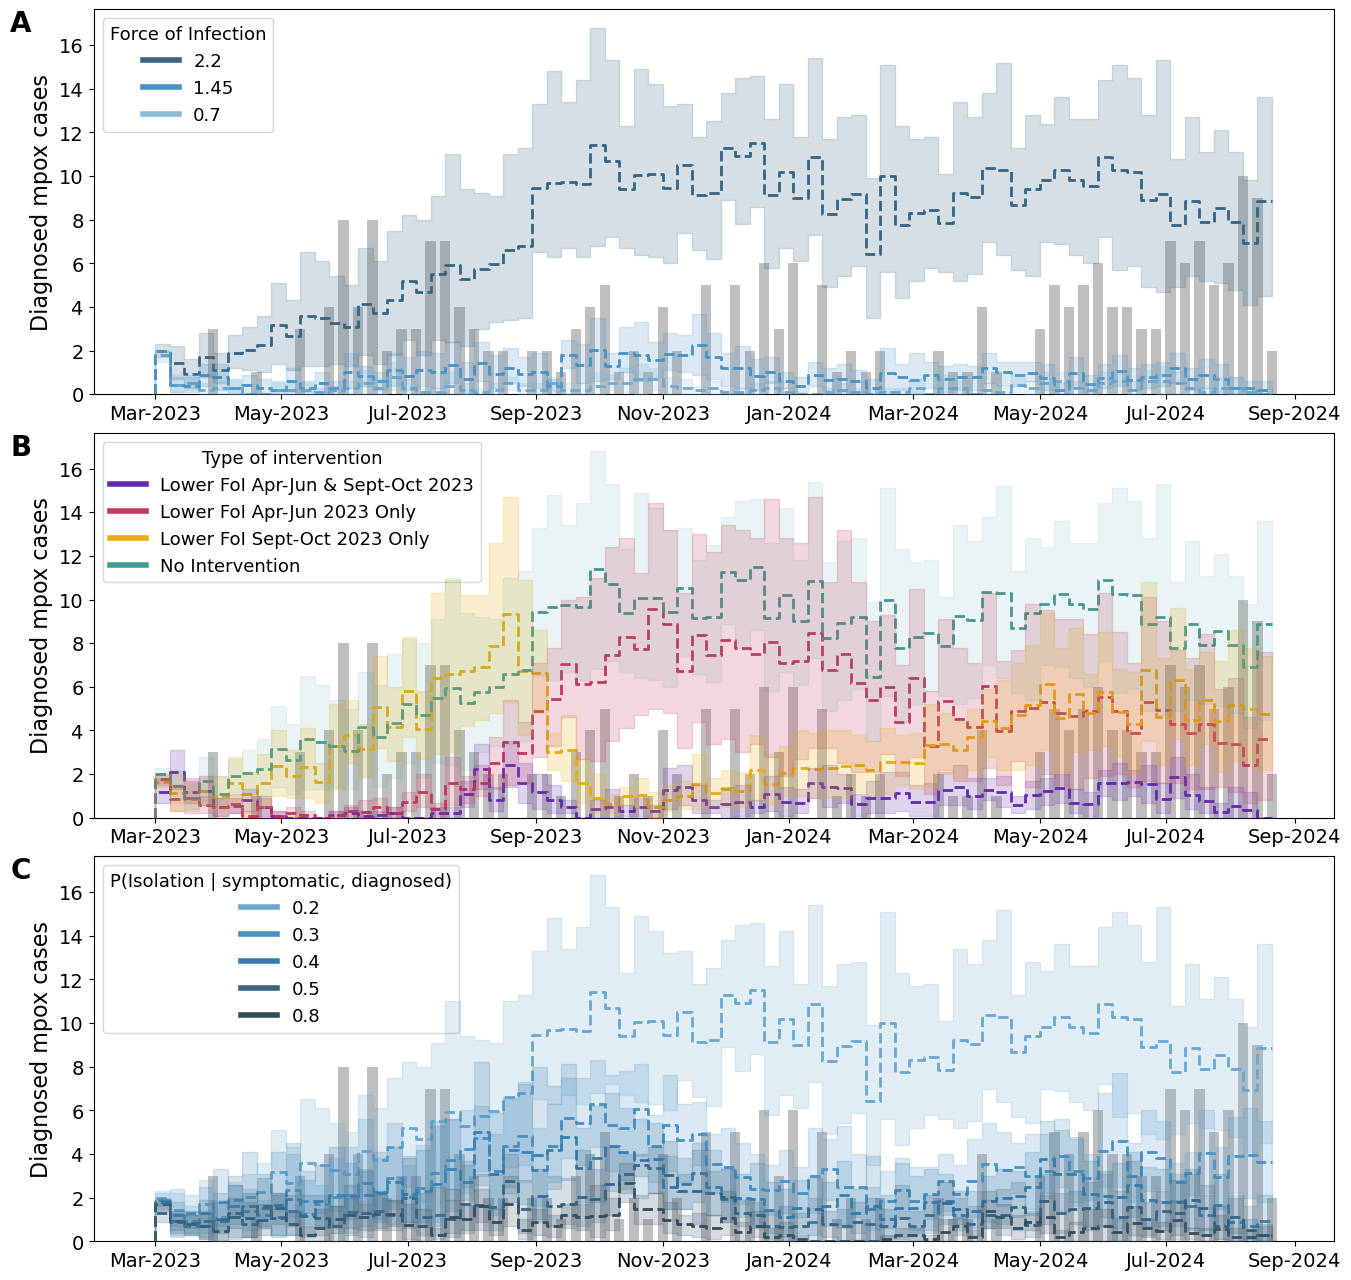

In [42]:
# Plotting FoI with phylo imports
fig = plt.figure(figsize=(16,16),facecolor='w')


#gs = GridSpec(2, 2, height_ratios=[6, 1], width_ratios=[0.25, 1], hspace=0.1)  
gs = GridSpec(3, 1,  hspace=0.1)  # three rows, one column

# Add the first subplot 
ax1 = fig.add_subplot(gs[0])

blues = sns.color_palette("Blues_d").as_hex()

sexual_behavior_long = pd.melt(modeling_df, id_vars='week_date', value_vars=['Empirical','Mean_S13', 'Mean_S12', 'Mean_S6','LowerBound_S13', 'LowerBound_S12', 'LowerBound_S6','UpperBound_S13', 'UpperBound_S12', 'UpperBound_S6', ])
sexual_behavior_long.week_date = pd.to_datetime(sexual_behavior_long.week_date)
modeling_df.week_date = pd.to_datetime(modeling_df.week_date)

#plot empirical cases
ax1.bar(sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].week_date ,sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot estimates with uncertainty intervals
ax1.step(modeling_df.week_date, modeling_df["Mean_S6"], color=blues[4],ls='--',lw=2 )
ax1.fill_between(modeling_df.week_date, modeling_df["LowerBound_S6"], modeling_df["UpperBound_S6"],alpha=0.2, step = "pre",  facecolor=blues[4],edgecolor=blues[4],zorder=1000)
#ax1.step(modeling_df.week_date, modeling_df["LowerBound_S6"],color=blues[4],lw=1,zorder=1000)
#ax1.step(modeling_df.week_date, modeling_df["UpperBound_S6"],color=blues[4],lw=1,zorder=1000)

ax1.step(modeling_df.week_date, modeling_df["Mean_S13"], color=blues[1],ls='--',lw=2 )
ax1.fill_between(modeling_df.week_date, modeling_df["LowerBound_S13"], modeling_df["UpperBound_S13"],alpha=0.2,step = "pre", facecolor=blues[0],edgecolor=blues[0],zorder=1000)
#ax1.step(modeling_df.week_date, modeling_df["LowerBound_S13"],color=blues[0],lw=1,zorder=1000)
#ax1.step(modeling_df.week_date, modeling_df["UpperBound_S13"],color=blues[0],lw=1,zorder=1000)

ax1.step(modeling_df.week_date, modeling_df["Mean_S12"], color=blues[2],ls='--',lw=2 )
ax1.fill_between(modeling_df.week_date, modeling_df["LowerBound_S12"], modeling_df["UpperBound_S12"],alpha=0.2,step = "pre", facecolor=blues[2],edgecolor=blues[2],zorder=1000)
#ax1.step(modeling_df.week_date, modeling_df["LowerBound_S12"],color=blues[2],lw=1,zorder=1000)
#ax1.step(modeling_df.week_date, modeling_df["UpperBound_S12"],color=blues[2],lw=1,zorder=1000)


#ax1.errorbar(modeling_df.week_date, modeling_df["Mean_S13"], yerr = [abs(modeling_df["Mean_S13"]-modeling_df["LowerBound_S13"]), modeling_df["UpperBound_S13"]-modeling_df["Mean_S13"]], color=blues[0], ecolor=blues[0])
#ax1.errorbar(modeling_df.week_date, modeling_df["Mean_S12"], yerr = [abs(modeling_df["Mean_S12"]-modeling_df["LowerBound_S12"]), modeling_df["UpperBound_S12"]-modeling_df["Mean_S12"]], color=blues[2], ecolor=blues[2])

legend_list = [mlines.Line2D([0], [0], color=blues[4], lw=4, label='2.2'),
                mlines.Line2D([0], [0], color=blues[2], lw=4, label='1.45'),
                mlines.Line2D([0], [0], color=blues[0], lw=4, label='0.7'),]

ax1.legend(handles=legend_list, title='Force of Infection', fontsize=13, title_fontsize=13, loc='upper left')



# Add the second subplot for the potential public health interventions based on phylo results
ax2 = fig.add_subplot(gs[1])

colors = sns.color_palette("CMRmap").as_hex()

PH_import_intervention_long = pd.melt(modeling_df, id_vars='week_date', value_vars=['Empirical','To.Aware_S11', 'To.Aware_S15', 'To.Aware_S16','To.Aware_S17', 'To.Aware_S18', 'To.Aware_S19', 'To.Aware_S6'])
PH_import_intervention_long.week_date = pd.to_datetime(PH_import_intervention_long.week_date)

PH_import_intervention_long.variable[PH_import_intervention_long.variable == "Empirical"] = "Empirical"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S11"] = "Lower FoI Apr-Jun & Sept-Oct 2023"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S15"] = "Lower FoI Apr-Jun 2023 Only"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S16"] = "Lower FoI Sept-Oct 2023 Only"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S17"] = "Randomly Selected 22 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S18"] = "Randomly Selected 13 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S19"] = "Randomly Selected 9 weeks"
PH_import_intervention_long.variable[PH_import_intervention_long.variable == "To.Aware_S6"] = "No Intervention"


#plot empirical cases
ax2.bar(PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].week_date ,PH_import_intervention_long[PH_import_intervention_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot estimates with uncertainty intervals
ax2.step(modeling_df.week_date, modeling_df["Mean_S11"], color=colors[1],ls='--',lw=2 )
ax2.fill_between(modeling_df.week_date, modeling_df["LowerBound_S11"], modeling_df["UpperBound_S11"],alpha=0.2, step = "pre", facecolor=colors[1],edgecolor=colors[1],zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["LowerBound_S11"],color=colors[1],lw=1,zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["UpperBound_S11"],color=colors[1],lw=1,zorder=1000)

ax2.step(modeling_df.week_date, modeling_df["Mean_S15"], color=colors[2],ls='--',lw=2 )
ax2.fill_between(modeling_df.week_date, modeling_df["LowerBound_S15"], modeling_df["UpperBound_S15"],alpha=0.2, step = "pre", facecolor=colors[2],edgecolor=colors[2],zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["LowerBound_S15"],color=colors[2],lw=1,zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["UpperBound_S15"],color=colors[2],lw=1,zorder=1000)

ax2.step(modeling_df.week_date, modeling_df["Mean_S16"], color=colors[4],ls='--',lw=2 )
ax2.fill_between(modeling_df.week_date, modeling_df["LowerBound_S16"], modeling_df["UpperBound_S16"],alpha=0.2, step = "pre", facecolor=colors[4],edgecolor=colors[4],zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["LowerBound_S16"],color=colors[4],lw=1,zorder=1000)
# ax2.plot(modeling_df.week_date, modeling_df["UpperBound_S16"],color=colors[4],lw=1,zorder=1000)

ax2.step(modeling_df.week_date, modeling_df["Mean_S6"], color="#439894",ls='--',lw=2 )
ax2.fill_between(modeling_df.week_date, modeling_df["LowerBound_S6"], modeling_df["UpperBound_S6"],alpha=0.1, step = "pre", facecolor="#439894",edgecolor="#439894",zorder=1000)

legend_list = [mlines.Line2D([0], [0], color=colors[1], lw=4, label='Lower FoI Apr-Jun & Sept-Oct 2023'),
                mlines.Line2D([0], [0], color=colors[2], lw=4, label='Lower FoI Apr-Jun 2023 Only'),
                mlines.Line2D([0], [0], color=colors[4], lw=4, label='Lower FoI Sept-Oct 2023 Only'),
               mlines.Line2D([0], [0], color="#439894", lw=4, label='No Intervention'),]
ax2.legend(handles=legend_list, title='Type of intervention', fontsize=13, title_fontsize=13, loc='upper left')


# Add the third subplot 
ax3 = fig.add_subplot(gs[2])

long_prop_iso_df = pd.melt(modeling_df, id_vars='week_date', value_vars=["Empirical", 'To.Aware_S6', 'To.Aware_S5', "To.Aware_S4", "To.Aware_S3", "To.Aware_S14"])
long_prop_iso_df.week_date = pd.to_datetime(long_prop_iso_df.week_date)


#plot empirical cases
ax3.bar(long_prop_iso_df[long_prop_iso_df.variable == "Empirical"].week_date ,long_prop_iso_df[long_prop_iso_df.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot estimates with uncertainty intervals
ax3.step(modeling_df.week_date, modeling_df["Mean_S6"], color=blues[1],ls='--',lw=2 )
ax3.fill_between(modeling_df.week_date, modeling_df["LowerBound_S6"], modeling_df["UpperBound_S6"],alpha=0.2, step = "pre", facecolor=blues[1],edgecolor=blues[1],zorder=1000)
# ax3.plot(modeling_df.week_date, modeling_df["LowerBound_S6"],color=blues[1],lw=1,zorder=1000)
# ax3.plot(modeling_df.week_date, modeling_df["UpperBound_S6"],color=blues[1],lw=1,zorder=1000)

ax3.step(modeling_df.week_date, modeling_df["Mean_S5"], color=blues[2],ls='--',lw=2 )
ax3.fill_between(modeling_df.week_date, modeling_df["LowerBound_S5"], modeling_df["UpperBound_S5"],alpha=0.2, step = "pre", facecolor=blues[2],edgecolor=blues[2],zorder=1000)
# ax3.plot(modeling_df.week_date, modeling_df["LowerBound_S5"],color=blues[2],lw=1,zorder=1000)
# ax3.plot(modeling_df.week_date, modeling_df["UpperBound_S5"],color=blues[2],lw=1,zorder=1000)

ax3.step(modeling_df.week_date, modeling_df["Mean_S4"], color=blues[3],ls='--',lw=2 )
ax3.fill_between(modeling_df.week_date, modeling_df["LowerBound_S4"], modeling_df["UpperBound_S4"],alpha=0.20, step = "pre", facecolor=blues[3],edgecolor=blues[3],zorder=1000)
# ax3.plot(modeling_df.week_date, modeling_df["LowerBound_S4"],color=blues[3],lw=1,zorder=1000)
# ax3.plot(modeling_df.week_date, modeling_df["UpperBound_S4"],color=blues[3],lw=1,zorder=1000)

ax3.step(modeling_df.week_date, modeling_df["Mean_S3"], color=blues[4],ls='--',lw=2 )
ax3.fill_between(modeling_df.week_date, modeling_df["LowerBound_S3"], modeling_df["UpperBound_S3"],alpha=0.20, step = "pre", facecolor=blues[4],edgecolor=blues[4],zorder=1000)
# ax3.plot(modeling_df.week_date, modeling_df["LowerBound_S3"],color=blues[4],lw=1,zorder=1000)
# ax3.plot(modeling_df.week_date, modeling_df["UpperBound_S3"],color=blues[4],lw=1,zorder=1000)

ax3.step(modeling_df.week_date, modeling_df["Mean_S14"], color=blues[5],ls='--',lw=2 )
ax3.fill_between(modeling_df.week_date, modeling_df["LowerBound_S14"], modeling_df["UpperBound_S14"],alpha=0.20, step = "pre", facecolor=blues[5],edgecolor=blues[5],zorder=1000)
# ax3.plot(modeling_df.week_date, modeling_df["LowerBound_S14"],color=blues[5],lw=1,zorder=1000)
# ax3.plot(modeling_df.week_date, modeling_df["UpperBound_S14"],color=blues[5],lw=1,zorder=1000)


legend_list = [mlines.Line2D([0], [0], color=blues[1], lw=4, label='0.2'),
                mlines.Line2D([0], [0], color=blues[2], lw=4, label='0.3'),
                mlines.Line2D([0], [0], color=blues[3], lw=4, label='0.4'),
                mlines.Line2D([0], [0], color=blues[4], lw=4, label='0.5'),
                mlines.Line2D([0], [0], color=blues[5], lw=4, label='0.8'),]
ax3.legend(handles=legend_list, title='P(Isolation | symptomatic, diagnosed)', fontsize=13, title_fontsize=13, loc='upper left')




# #plot linegraph of simulated cases
# sns.lineplot(
#     data=long_prop_iso_df[long_prop_iso_df.variable != "Empirical"],
#     x='week_date',
#     y='value',
#     hue='variable',
#     palette='Blues_d',
#     legend= "full", 
#     linewidth = 2,
#     ax = ax3
# )

# #plot scatter points of simulated cases on top of linegraph
# sns.scatterplot(
#     data=long_prop_iso_df[long_prop_iso_df.variable != "Empirical"],
#     x='week_date',
#     y='value',
#     hue = "variable",
#     palette = "Blues_d",
#     s=25,  # Adjust point size
#     marker='o', 
#     legend = None, 
#     ax = ax3
# )

#ax1.legend(title = "Force of Infection", loc = "upper left")
#ax2.legend(title = "Type of Intervention", loc = "upper left")
#ax3.legend(title = "P(Isolation | symptomatic, diagnosed)", loc = "upper left")



# Format the x-axis for dates
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
#ax1.xticks(rotation=45)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Set axis labels
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_ylabel('Diagnosed mpox cases', size = 16)
ax1.set_xlabel('')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax2.set_ylabel('Diagnosed mpox cases', size = 16)
ax2.set_xlabel('')
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='minor', labelsize=14)
ax3.set_ylabel('Diagnosed mpox cases', size = 16)
ax3.set_xlabel('')
#ax.set_ylim(0, 0.10)  # Y-axis limits

## add in letters for pub
ax1.text(-0.05, 1, "A", transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax2.text(-0.05, 1, "B", transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
ax3.text(-0.05, 1, "C", transform=ax3.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  


# Show the plot
plt.tight_layout()
plt.savefig('../figures/microsim_results_with_uncertainty_2.png',dpi=300,bbox_inches='tight')
plt.show()

In [13]:
### now plotting sensitivity analysis assuming 2X importations

In [14]:
modeling_2x_imports_df = pd.read_csv("../data/microsimulation_results/2Xscenarios_aware.csv")
modeling_2x_imports_df.head()


,week,Empirical,To.Aware_S1,To.Aware_S2,To.Aware_S3,To.Aware_S4,To.Aware_S5,To.Aware_S6,To.Aware_S7,To.Aware_S11,To.Aware_S12,To.Aware_S13
0,0,0.0,0,0,0,0,0,0,0,0,0,0
1,1,0.0,2,2,2,2,1,2,2,2,2,2
2,2,0.0,0,1,1,2,1,1,1,1,1,1
3,3,0.0,0,1,2,1,1,1,1,1,1,0
4,4,3.0,0,1,2,2,1,1,1,1,1,1


In [15]:
start_date = datetime(2023, 3, 1)
modeling_2x_imports_df['week_date'] = modeling_2x_imports_df['week'].apply(lambda x: (start_date + timedelta(weeks=x)).strftime('%Y-%m-%d'))
modeling_2x_imports_df = modeling_2x_imports_df.dropna()
modeling_2x_imports_df.head()

,week,Empirical,To.Aware_S1,To.Aware_S2,To.Aware_S3,To.Aware_S4,To.Aware_S5,To.Aware_S6,To.Aware_S7,To.Aware_S11,To.Aware_S12,To.Aware_S13,week_date
0,0,0.0,0,0,0,0,0,0,0,0,0,0,2023-03-01
1,1,0.0,2,2,2,2,1,2,2,2,2,2,2023-03-08
2,2,0.0,0,1,1,2,1,1,1,1,1,1,2023-03-15
3,3,0.0,0,1,2,1,1,1,1,1,1,0,2023-03-22
4,4,3.0,0,1,2,2,1,1,1,1,1,1,2023-03-29


/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/2269199327.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexual_behavior_long.variable[sexual_behavior_long.variable == "Empirical"] = "Empirical"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/2269199327.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S13"] = "0.7"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_8882/2269199327.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

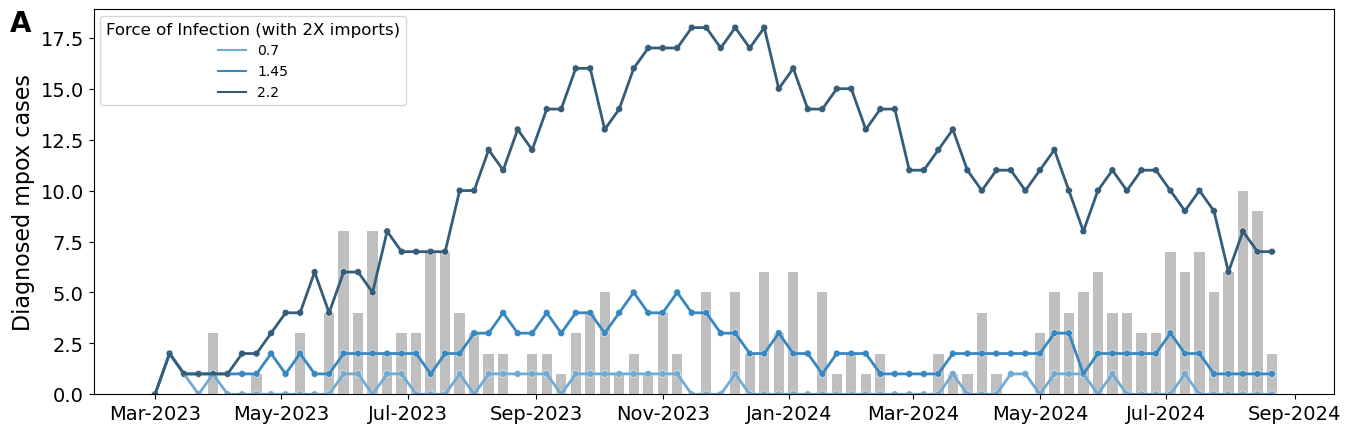

In [16]:
# Plotting FoI with phylo imports
fig = plt.figure(figsize=(16,16),facecolor='w')


#gs = GridSpec(2, 2, height_ratios=[6, 1], width_ratios=[0.25, 1], hspace=0.1)  
gs = GridSpec(3, 1,  hspace=0.1)  # Two rows, one column

# Add the first subplot 
ax1 = fig.add_subplot(gs[0])

sexual_behavior_long = pd.melt(modeling_2x_imports_df, id_vars='week_date', value_vars=['Empirical','To.Aware_S13', 'To.Aware_S12', 'To.Aware_S6'])
sexual_behavior_long.week_date = pd.to_datetime(sexual_behavior_long.week_date)

sexual_behavior_long.variable[sexual_behavior_long.variable == "Empirical"] = "Empirical"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S13"] = "0.7"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S12"] = "1.45"
sexual_behavior_long.variable[sexual_behavior_long.variable == "To.Aware_S6"] = "2.2"

#plot empirical cases
ax1.bar(sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].week_date ,sexual_behavior_long[sexual_behavior_long.variable == "Empirical"].value, color = "gray", alpha = 0.5, width = 5)

#plot linegraph of simulated cases
sns.lineplot(
    data=sexual_behavior_long[sexual_behavior_long.variable != "Empirical"],
    x='week_date',
    y='value',
    hue='variable',
    palette='Blues_d',
    legend= "full", 
    linewidth = 2,
    ax = ax1
)

#plot scatter points of simulated cases on top of linegraph
sns.scatterplot(
    data=sexual_behavior_long[sexual_behavior_long.variable != "Empirical"],
    x='week_date',
    y='value',
    hue = "variable",
    palette = "Blues_d",
    s=25,  # Adjust point size
    marker='o', 
    legend = None, 
    ax = ax1
)


ax1.legend(title = "Force of Infection (with 2X imports)", loc = "upper left")

# Format the x-axis for dates

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))


# Set axis labels
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_ylabel('Diagnosed mpox cases', size = 16)
ax1.set_xlabel('')

## add in letters for pub
ax1.text(-0.05, 1, "A", transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')  
 
# Show the plot
plt.tight_layout()
plt.savefig('../figures/microsim_results_2x_imports.png',dpi=300,bbox_inches='tight')
plt.show()